In [1]:
import dotenv
import os
from sqlalchemy import create_engine
import pandas as pd
dotenv.load_dotenv(override=True)
username=os.getenv("username")
password=os.getenv("password")
host=os.getenv("host")
dbname='Titanic'
conn_string = f"mysql+pymysql://{username}:{password}@{host}/{dbname}"
db_engine = create_engine(conn_string)
query = """SELECT * FROM titanic
 #       """
df = pd.read_sql(query, db_engine)
db_engine.dispose()
df.shape
df

,PassengerId,PClass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,EmbarkDate
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,,S,0,10-4-1912
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.28,C85,C,1,11-4-1912
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.93,,S,1,10-4-1912
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S,1,10-4-1912
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,,S,0,10-4-1912
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,0.0,0,0,A.5. 3236,8.05,,S,0,10-4-1912
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.90,C105,C,1,11-4-1912
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.25,,S,0,10-4-1912
1307,1308,3,"Ware, Mr. Frederick",male,0.0,0,0,359309,8.05,,S,0,10-4-1912


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   PClass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1309 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1309 non-null   float64
 9   Cabin        1309 non-null   object 
 10  Embarked     1309 non-null   object 
 11  Survived     1309 non-null   int64  
 12  EmbarkDate   1309 non-null   object 
dtypes: float64(2), int64(5), object(6)
memory usage: 133.1+ KB


In [5]:
df['EmbarkDate'] = pd.to_datetime(df['EmbarkDate'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   PassengerId  1309 non-null   int64         
 1   PClass       1309 non-null   int64         
 2   Name         1309 non-null   object        
 3   Sex          1309 non-null   object        
 4   Age          1309 non-null   float64       
 5   SibSp        1309 non-null   int64         
 6   Parch        1309 non-null   int64         
 7   Ticket       1309 non-null   object        
 8   Fare         1309 non-null   float64       
 9   Cabin        1309 non-null   object        
 10  Embarked     1309 non-null   object        
 11  Survived     1309 non-null   int64         
 12  EmbarkDate   1307 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(5), object(5)
memory usage: 133.1+ KB


In [24]:
lettere = df['Cabin'].dropna().str[0]
lettere_unique = lettere.unique()
num_ponti = len(lettere_unique)
num_ponti


9

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

NameError: name 'ax' is not defined

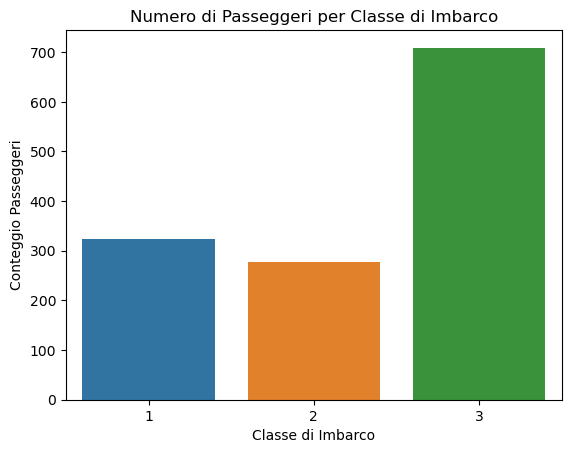

In [28]:
sns.countplot(x='PClass', data=df)
plt.title('Numero di Passeggeri per Classe di Imbarco')
plt.xlabel('Classe di Imbarco')
plt.ylabel('Conteggio Passeggeri')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()


AttributeError: 'numpy.int64' object has no attribute 'startswith'

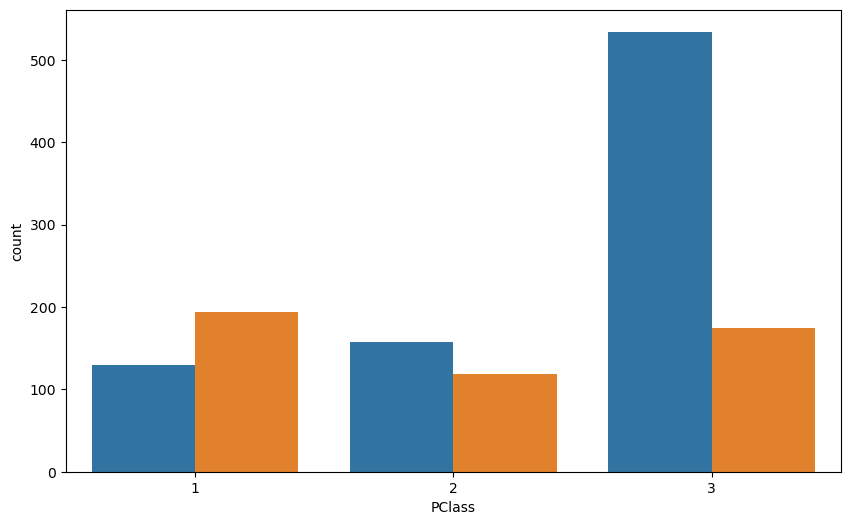

In [34]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='PClass', hue='Survived', data=df)

# Personalizzazione: titolo, legenda e etichette degli assi
plt.title('Sopravvissuti e Non Sopravvissuti per Classe di Imbarco')
plt.xlabel('Classe di Imbarco')
plt.ylabel('Conteggio Passeggeri')
plt.legend(title='Sopravvissuto', labels=['No', 'Sì'])

# Aggiunta delle etichette con il conteggio su ciascuna barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')

# Visualizzazione del grafico
plt.show()


C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


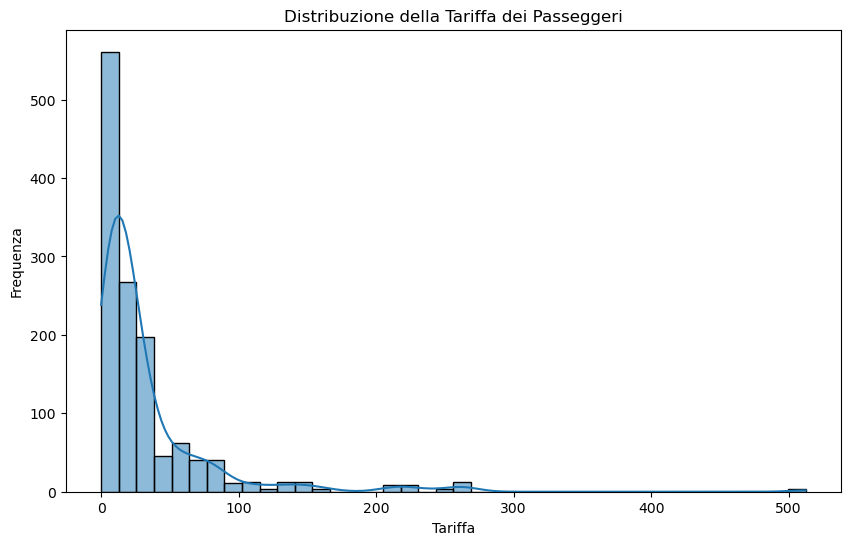

In [48]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Fare'], kde = True, bins=40)

plt.title('Distribuzione della Tariffa dei Passeggeri')
plt.xlabel('Tariffa')
plt.ylabel('Frequenza')

plt.show()

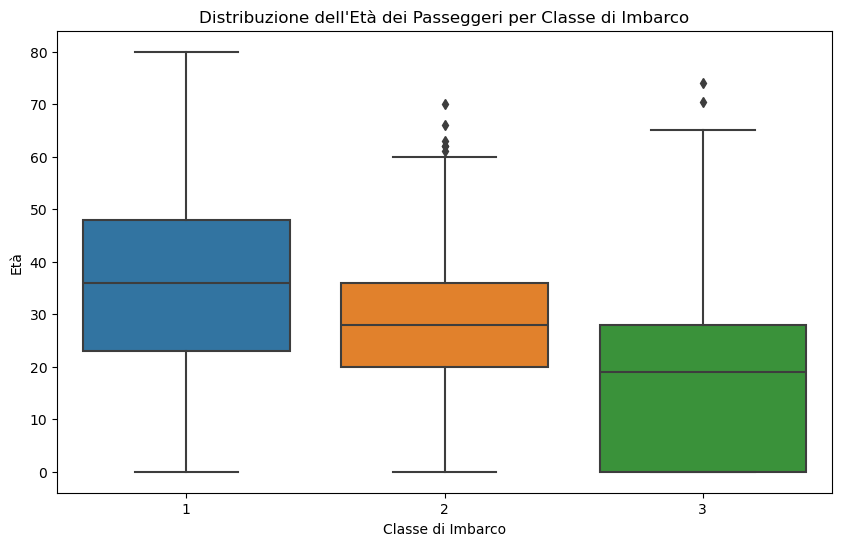

In [40]:

plt.figure(figsize=(10, 6))
sns.boxplot(x='PClass', y='Age', data=df)

plt.title('Distribuzione dell\'Età dei Passeggeri per Classe di Imbarco')
plt.xlabel('Classe di Imbarco')
plt.ylabel('Età')

plt.show()


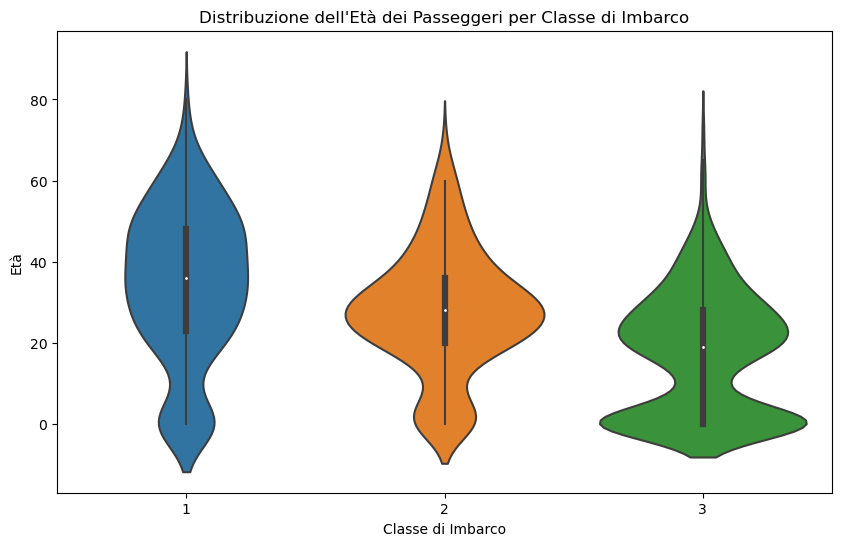

In [42]:

plt.figure(figsize=(10, 6))
sns.violinplot(x='PClass', y='Age', data=df)

plt.title('Distribuzione dell\'Età dei Passeggeri per Classe di Imbarco')
plt.xlabel('Classe di Imbarco')
plt.ylabel('Età')

plt.show()


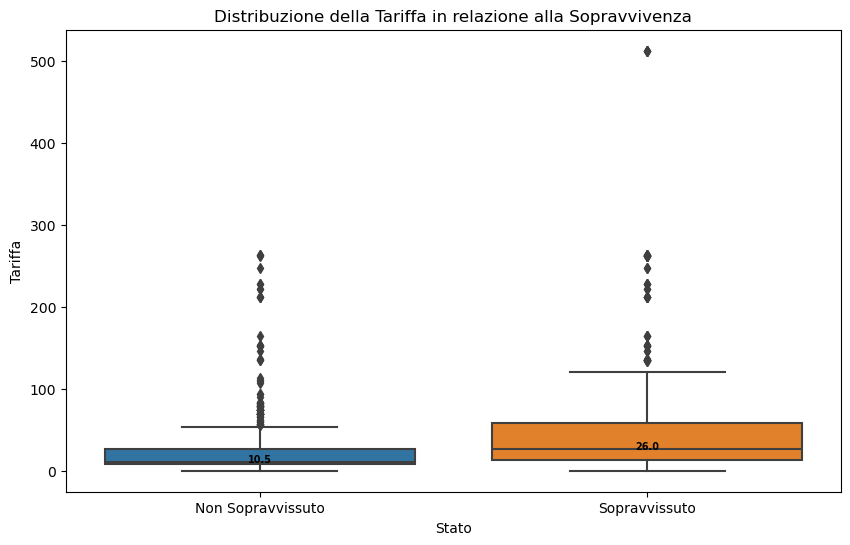

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='Survived', y='Fare', data=df)

plt.title('Distribuzione della Tariffa in relazione alla Sopravvivenza')
plt.xlabel('Stato')
plt.ylabel('Tariffa')

ax.set_xticklabels(['Non Sopravvissuto', 'Sopravvissuto'])

medians = df.groupby(['Survived'])['Fare'].median().values
median_labels = [str(np.round(s, 2)) for s in medians]

pos = range(len(medians))
for tick, label in zip(pos, ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] + 0.03, median_labels[tick], 
            horizontalalignment='center', size='x-small', color='black', weight='semibold')

plt.show()



In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
sd = pd.read_csv('stockdata.csv')
sd.head()

,MSFT,IBM,SBUX,AAPL,GSPC,Date
0,23.950705,80.517962,16.149666,11.086612,1416.599976,2007-01-03
1,23.910599,81.378851,16.167992,11.332687,1418.339966,2007-01-04
2,23.774242,80.642129,16.099269,11.251984,1409.709961,2007-01-05
3,24.006852,81.867244,16.039710,11.307550,1412.839966,2007-01-08
4,24.030914,82.835742,15.970989,12.246870,1412.109985,2007-01-09


C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


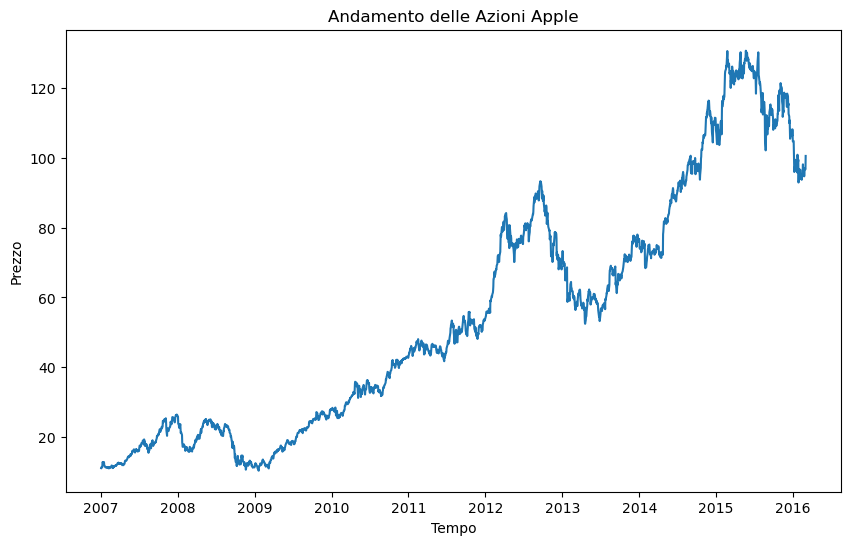

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sd['Date'] = pd.to_datetime(sd['Date'])

plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='AAPL', data=sd)

plt.title('Andamento delle Azioni Apple')
plt.xlabel('Tempo')
plt.ylabel('Prezzo')

plt.show()


C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


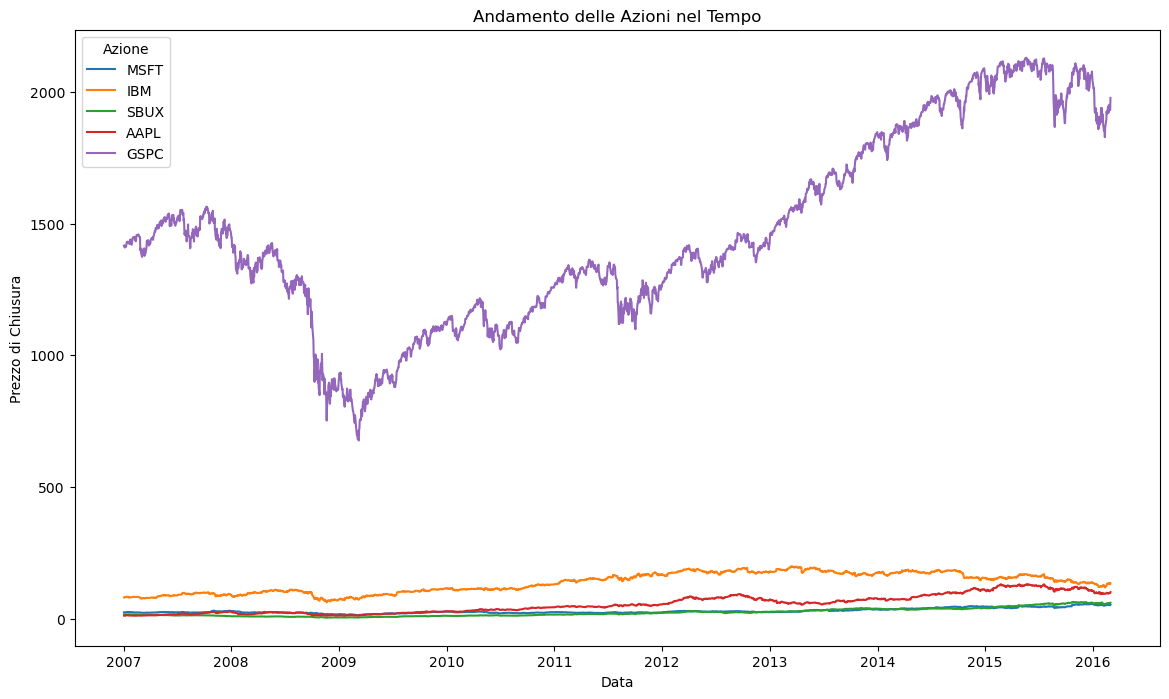

In [73]:
sd['Date'] = pd.to_datetime(sd['Date'])

# Trasformazione del DataFrame da wide a long
sd_long = pd.melt(sd, id_vars=['Date'], var_name='Stock', value_name='Price')

# Creazione del grafico a linee
plt.figure(figsize=(14, 8))
sns.lineplot(x='Date', y='Price', hue='Stock', data=sd_long)

# Personalizzazione del grafico
plt.title('Andamento delle Azioni nel Tempo')
plt.xlabel('Data')
plt.ylabel('Prezzo di Chiusura')
plt.legend(title='Azione')

# Visualizzazione del grafico
plt.show()

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


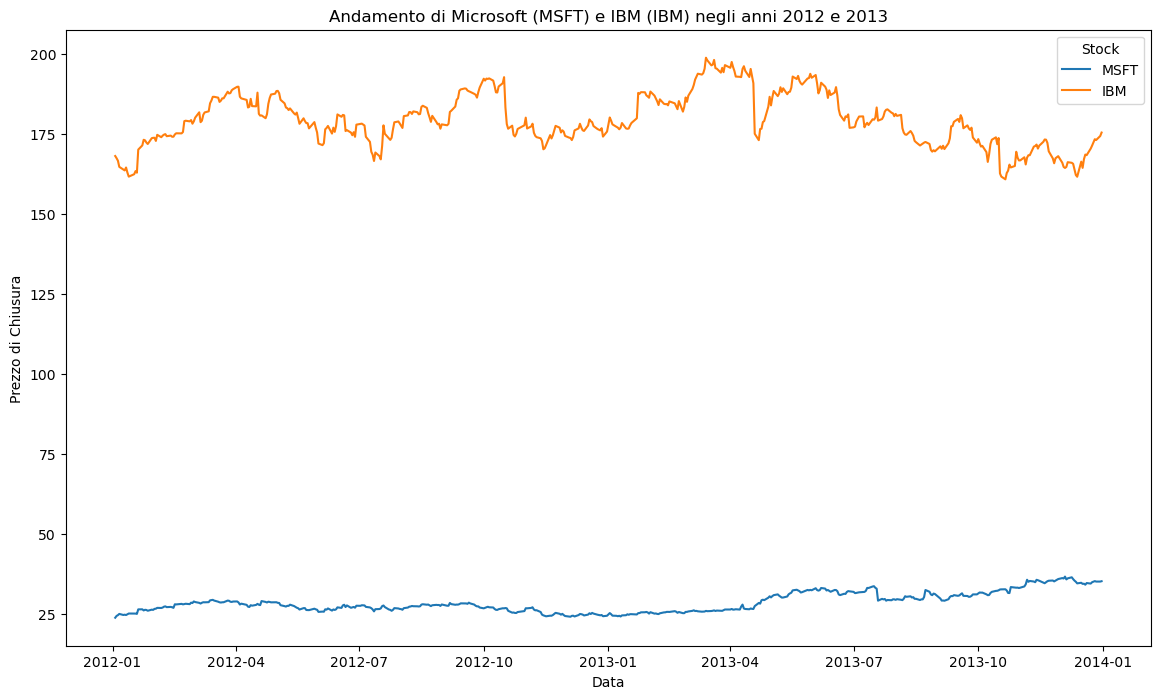

In [6]:
sd['Date'] = pd.to_datetime(sd['Date'])

# Trasformazione del DataFrame da wide a long
df_long = pd.melt(sd, id_vars=['Date'], var_name='Stock', value_name='Price')

# Filtra per le azioni MSFT e IBM
df_filtered = df_long[(df_long['Stock'] == 'MSFT') | (df_long['Stock'] == 'IBM')]

# Filtra per gli anni 2012 e 2013
df_filtered = df_filtered[(df_filtered['Date'].dt.year == 2012) | (df_filtered['Date'].dt.year == 2013)]

# Creazione del grafico a linee
plt.figure(figsize=(14, 8))
sns.lineplot(x='Date', y='Price', hue='Stock', data=df_filtered)

# Personalizzazione del grafico
plt.title('Andamento di Microsoft (MSFT) e IBM (IBM) negli anni 2012 e 2013')
plt.xlabel('Data')
plt.ylabel('Prezzo di Chiusura')

# Visualizzazione del grafico
plt.show()


C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


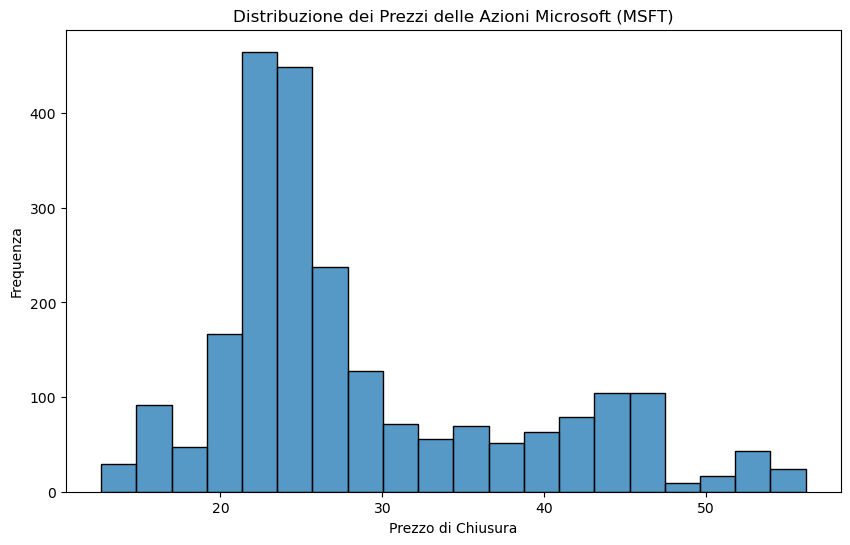

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(sd['MSFT'], bins=20, kde=False)
plt.title('Distribuzione dei Prezzi delle Azioni Microsoft (MSFT)')
plt.xlabel('Prezzo di Chiusura')
plt.ylabel('Frequenza')
plt.show()


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

df = pd.read_csv('Esercizi/metal_bands_2017.csv', encoding='ISO-8859-1')
df

,Unnamed: 0,band_name,fans,formed,origin,split,style
0,0,Iron Maiden,4195,1975,United Kingdom,-,"New wave of british heavy,Heavy"
1,1,Opeth,4147,1990,Sweden,1990,"Extreme progressive,Progressive rock,Progressive"
2,2,Metallica,3712,1981,USA,-,"Heavy,Bay area thrash"
3,3,Megadeth,3105,1983,USA,1983,"Thrash,Heavy,Hard rock"
4,4,Amon Amarth,3054,1988,Sweden,-,Melodic death
...,...,...,...,...,...,...,...
4995,4995,Atara,0,2006,France,2006,"Black,Grindcore"
4996,4996,Avicularia,0,2003,Croatia,-,Avantgarde death
4997,4997,Awake,0,2006,United Kingdom,2006,"Heavy,Progressive"
4998,4998,Axatak,0,1983,Australia,1988,"Hard rock,Heavy"


In [2]:
df.band_name.nunique()

4949

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Supponiamo che il tuo DataFrame si chiami 'df' e abbia una colonna 'band_name' e 'fans'

# Creazione del punto trama
plt.figure(figsize=(10, 6))
sns.stripplot(y='band_name', x='fans', data=df, size=4, orient='h')

# Personalizzazione del grafico
plt.title('Numero di Fan per Band Metal')
plt.xlabel('Numero di Fan')
plt.ylabel('Band')

# Visualizzazione del grafico
plt.show()


C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


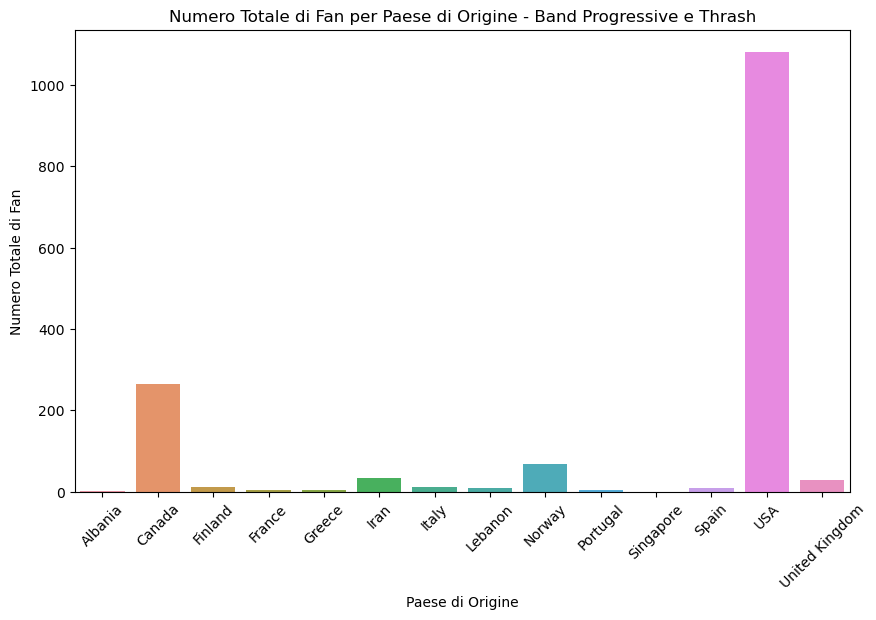

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

progressive_thrash_bands = df[df['style'].str.contains('Progressive') & df['style'].str.contains('Thrash')]

fans_by_origin = progressive_thrash_bands.groupby('origin')['fans'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='origin', y='fans', data=fans_by_origin)

plt.title('Numero Totale di Fan per Paese di Origine - Band Progressive e Thrash')
plt.xlabel('Paese di Origine')
plt.ylabel('Numero Totale di Fan')

plt.xticks(rotation=45)

plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_13512\3018646911.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['formed'] = df_clean['formed'].astype(int)
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


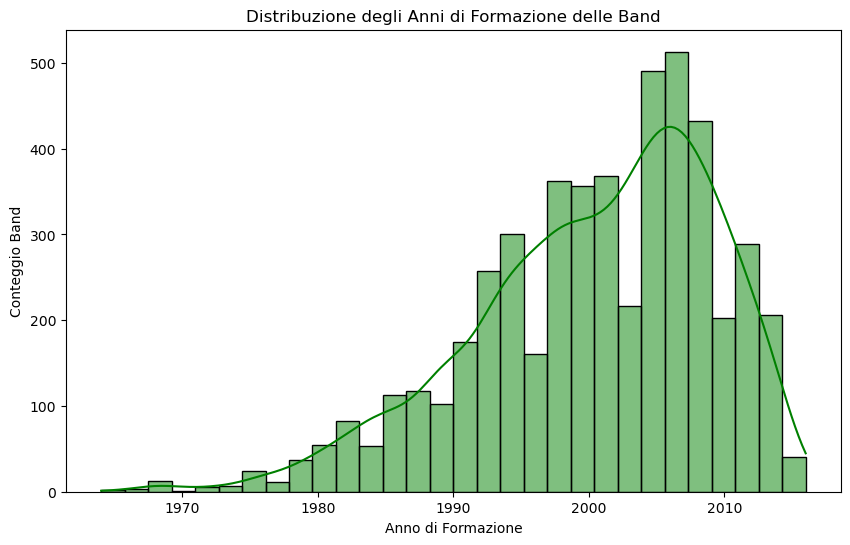

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assumiamo che il tuo DataFrame si chiami 'df' e che 'formed' sia la colonna con l'anno di formazione delle band

# Converti la colonna 'formed' in numerico, imposta su NaN i valori non convertibili
df['formed'] = pd.to_numeric(df['formed'], errors='coerce')

# Rimuovi eventuali valori NaN che potrebbero essere stati introdotti con la conversione
df_clean = df.dropna(subset=['formed'])

# Assicurati che i valori in 'formed' siano interi (se necessario)
df_clean['formed'] = df_clean['formed'].astype(int)

# Creazione dell'istogramma
plt.figure(figsize=(10, 6))
sns.histplot(df_clean['formed'], bins=30, kde=True, color = 'Green')

# Personalizzazione del grafico
plt.title('Distribuzione degli Anni di Formazione delle Band')
plt.xlabel('Anno di Formazione')
plt.ylabel('Conteggio Band')

# Visualizzazione del grafico
plt.show()


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

party = pd.read_csv('beginner_datasets/party_in_nyc.csv')
party.head()

,Created Date,Closed Date,Location Type,Incident Zip,City,Borough,Latitude,Longitude
0,2015-12-31 00:01:15,2015-12-31 03:48:04,Store/Commercial,10034.0,NEW YORK,MANHATTAN,40.866183,-73.918930
1,2015-12-31 00:02:48,2015-12-31 04:36:13,Store/Commercial,10040.0,NEW YORK,MANHATTAN,40.859324,-73.931237
2,2015-12-31 00:03:25,2015-12-31 00:40:15,Residential Building/House,10026.0,NEW YORK,MANHATTAN,40.799415,-73.953371
3,2015-12-31 00:03:26,2015-12-31 01:53:38,Residential Building/House,11231.0,BROOKLYN,BROOKLYN,40.678285,-73.994668
4,2015-12-31 00:05:10,2015-12-31 03:49:10,Residential Building/House,10033.0,NEW YORK,MANHATTAN,40.850304,-73.938516


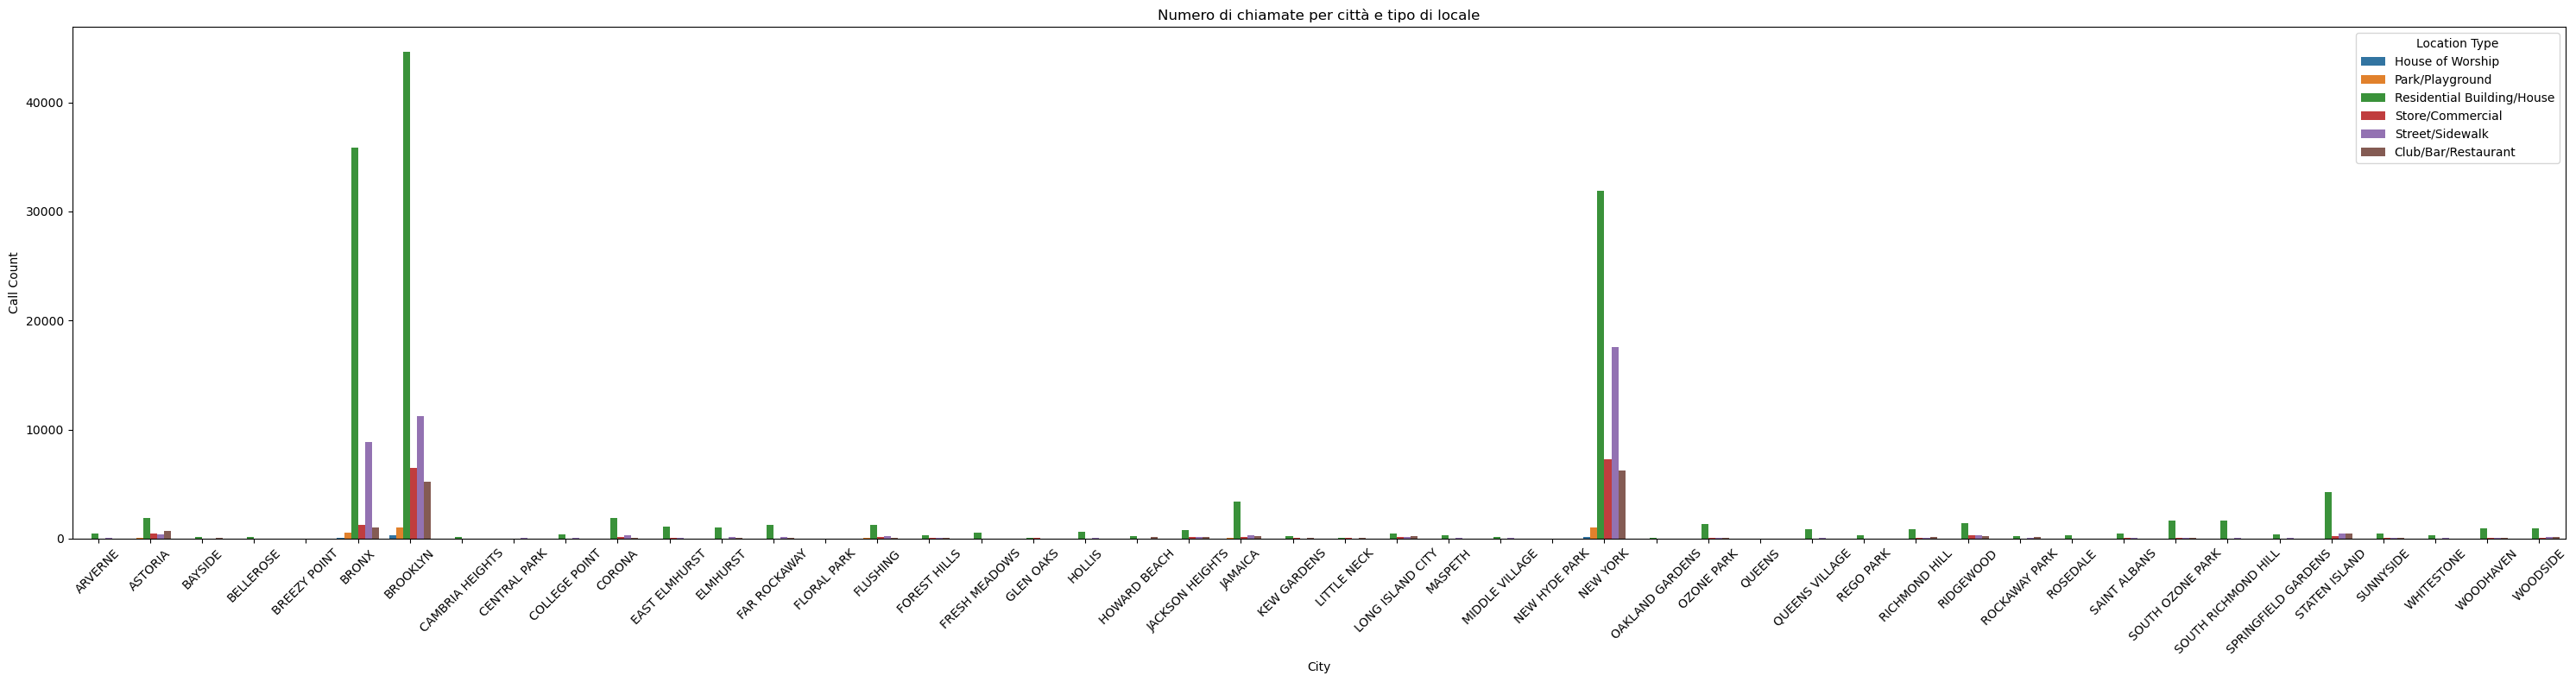

In [6]:
aggregated = party.groupby(['City', 'Location Type']).size().reset_index(name='Call Count')

# Creare un grafico a barre con Seaborn
plt.figure(figsize=(30, 8))
sns.barplot(data=aggregated, x='City', y='Call Count', hue='Location Type')  # Usa 'data=aggregated'
plt.title('Numero di chiamate per città e tipo di locale')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrare il grafico
plt.show()


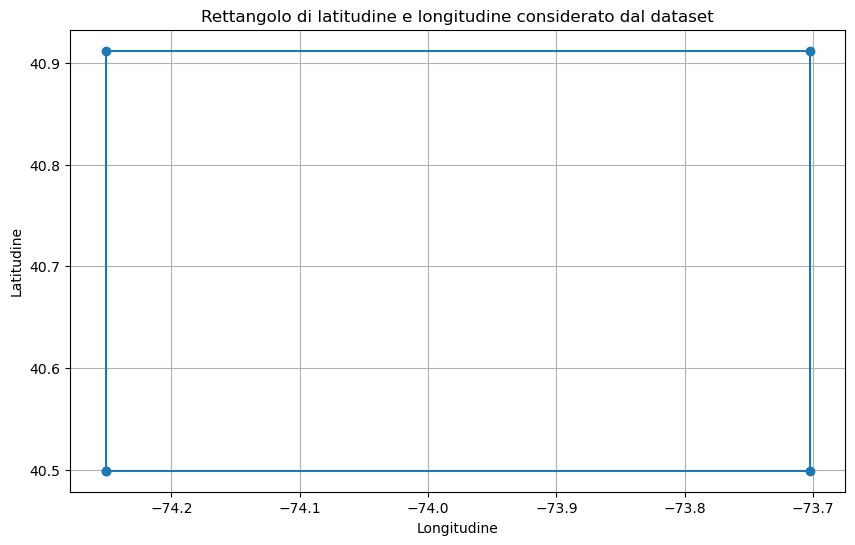

In [11]:

# Trovare la latitudine minima e massima
latitude_min = party['Latitude'].min()
latitude_max = party['Latitude'].max()

# Trovare la longitudine minima e massima
longitude_min = party['Longitude'].min()
longitude_max = party['Longitude'].max()

latitudes = [latitude_min, latitude_min, latitude_max, latitude_max, latitude_min]
longitudes = [longitude_min, longitude_max, longitude_max, longitude_min, longitude_min]

plt.figure(figsize=(10, 6))
plt.plot(longitudes, latitudes, marker='o')  
plt.title('Rettangolo di latitudine e longitudine considerato dal dataset')
plt.xlabel('Longitudine')
plt.ylabel('Latitudine')
plt.grid(True)

plt.show()

In [15]:
private_houses_reports = party[party['Location Type'] == 'Residential Building/House']

num_reports = private_houses_reports.shape[0]

num_reports


146040

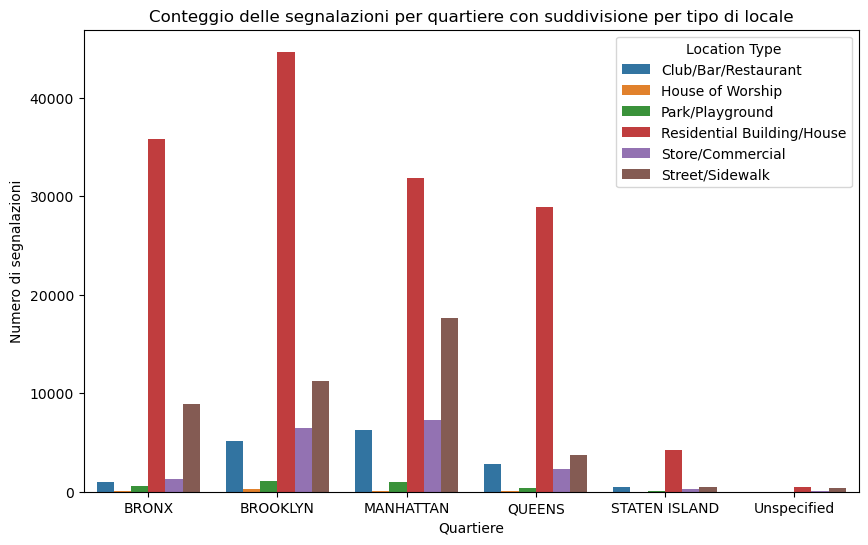

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

reports_by_borough = party.groupby(['Borough', 'Location Type']).size().reset_index(name='Count')

plt.figure(figsize=(10, 6))
sns.barplot(data=reports_by_borough, x='Borough', y='Count', hue='Location Type')
plt.title('Conteggio delle segnalazioni per quartiere con suddivisione per tipo di locale')
plt.xlabel('Quartiere')
plt.ylabel('Numero di segnalazioni')

plt.show()

